In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mpl.style.use('seaborn-darkgrid')
mpl.rcParams.update({'font.size': 18})

In [3]:
pd.options.display.max_rows = 10

# Probability

This chapter takes a geometric view of probability theory and relates it to
familiar concepts in linear algebra and geometry.  This approach connects your
natural geometric intuition to the key abstractions in probability that can
help guide your reasoning.  This is particularly important in probability
because it is easy to be misled. We need a bit of rigor and some
intuition to guide us.

In grade school, you were introduced to the natural numbers (i.e., `1,2,3,..`)
and you learned how to manipulate them by operations like addition,
subtraction, and multiplication. Later, you were introduced to positive and
negative numbers and were again taught how to manipulate them. Ultimately, you
were introduced to the calculus of the real line, and learned how to
differentiate, take limits, and so on. This progression provided more
abstractions, but also widened the field of problems you could successfully
tackle. The same is true of probability. **One way to think about probability is
as a  new number concept that allows you to tackle problems that have a special
kind of *uncertainty* built into them. Thus, the key idea is that there is some
number, say $x$, with a traveling companion, say, $f(x)$, and this companion
represents the uncertainties about the value of $x$ as if looking at the number
$x$ through a frosted window. The degree of opacity of the window is
represented by $f(x)$.**  If we want to manipulate $x$, then we have to figure
out what to do with $f(x)$. For example if we want $y= 2 x $, then we have to
understand how $f(x)$ generates $f(y)$. 

Where is the *random* part?   To conceptualize this, we need still **another
analogy: think about a beehive with the swarm around it representing $f(x)$,
and the hive itself, which you can barely see through the swarm, as $x$.** The
random piece is you don't know *which* bee in particular is going to sting you!
Once this happens the uncertainty evaporates.
Up until that happens, all we have is a concept of a swarm (i.e., density of
bees) which represents a *potentiality* of which bee will ultimately sting.
In summary, one way to think about probability is as a way of carrying through
mathematical reasoning (e.g., adding, subtracting, taking
limits) with a notion of potentiality that is so-transformed by these
operations.

## Understanding Probability Density

In order to understand the heart of modern probability, which is built
on the **Lesbesgue theory of integration**, we need to extend the concept
of integration from basic calculus. To begin, let us consider the
following piecewise function

$$
f(x)  =  \begin{cases}
                1 & \mbox{if }  0 < x \leq 1 \\\
                2 & \mbox{if }  1 < x \leq 2 \\\
                0 & \mbox{otherwise }
            \end{cases}
$$

 as shown in [Figure](#fig:intro_001). In calculus, **you learned
Riemann integration**, which you can apply here  as

<!-- dom:FIGURE: [fig-probability/intro_001.jpg, width=500 frac=0.75]  <div id="fig:intro_001"></div> -->
<!-- begin figure -->
<div id="fig:intro_001"></div>

<p></p>
<img src="fig-probability/intro_001.jpg" width=500>

<!-- end figure -->

$$
\int_0^2 f(x) dx = 1 + 2 = 3
$$

 which has the **usual interpretation as the area of the two rectangles
that make up $f(x)$**.  So far, so good.

With **Lesbesgue integration, the idea is very similar except that we
focus on the y-axis instead of moving along the x-axis.**

The question is given $f(x) = 1$, what is the set of $x$ values for which this is
true? For our example, this is true whenever $x\in (0,1]$. 

So now we have a correspondence between the values of the function (namely, `1`
and `2`) and the sets of $x$ values for which this is true, namely,
$\lbrace (0,1] \rbrace$ and $\lbrace (1,2] \rbrace$, respectively. 

To compute the integral, we simply take the function values (i.e., `1,2`)
and **some way of measuring the size of the corresponding interval**
(i.e.,  $\mu$) as in the following:

$$
\int_0^2 f d\mu = 1 \mu(\lbrace (0,1] \rbrace) + 2 \mu(\lbrace (1,2] \rbrace)
$$

We have suppressed some of the notation above to emphasize generality. 

**Note
that we obtain the same value of the integral as in the Riemann case when
$\mu((0,1]) = \mu((1,2]) = 1$.**

By introducing the $\mu$ function as  a way of
measuring the intervals above, we have introduced another degree of freedom in
our integration. 

This accommodates many weird functions that are not tractable
using the usual Riemann theory, but we refer you to a proper introduction to
Lesbesgue integration for further study [[jones2001lebesgue]](#jones2001lebesgue).  

**Nonetheless,
the key step in the above discussion is the introduction of the $\mu$ function,
which we will encounter again as the so-called probability density function.**

## Random Variables

Most introductions to probability jump straight into *random variables* and
then explain how to compute complicated integrals. The problem with this
approach is that it skips over some of the important subtleties that we will now
consider. 

Unfortunately, the term *random variable* is not very descriptive. A
better term is *measurable function*.  


To understand why this is a better term,
we have to dive into the formal constructions of probability by way of a simple
example.

Consider tossing a fair six-sided die. There are only six outcomes possible,

$$
\Omega=\lbrace 1,2,3,4,5,6 \rbrace
$$

As we know, if the die is fair, then the probability of each outcome is $1/6$.

To say this formally, the measure  of each set (i.e., $\lbrace 1 \rbrace,\lbrace
2 \rbrace,\ldots,\lbrace 6 \rbrace$) is $\mu(\lbrace 1 \rbrace ) =\mu(\lbrace 2
\rbrace ) \ldots = \mu(\lbrace 6 \rbrace ) = 1/6$. 

In this case, the $\mu$
function we discussed earlier is the usual *probability* mass function, denoted by
$\mathbb{P}$. The measurable function  maps a set into a
number on the real line. For example, $ \lbrace 1 \rbrace \mapsto 1 $ is
one such  uninteresting function.

Now, here's where things get interesting. 


**Suppose you were asked to construct a fair coin from the fair die.** In other words, we want to throw the die and then record the outcomes as if we had just tossed a fair coin. How could we do this?


One way would be to define a measurable function that says if the die comes up
`3` or less, then we declare *heads* and otherwise declare *tails*. This has
some strong intuition behind it, but let's articulate it in terms of formal
theory.  


This strategy creates two different non-overlapping sets $\lbrace
1,2,3 \rbrace$ and $\lbrace 4,5,6 \rbrace$. Each set has the same probability
*measure*,

$$
\begin{eqnarray*}
\mathbb{P}(\lbrace 1,2,3 \rbrace)  & = &  1/2  \\\
\mathbb{P}(\lbrace 4,5,6 \rbrace) & = & 1/2
\end{eqnarray*}
$$

 And the problem is solved. Everytime the die comes up
$\lbrace 1,2,3 \rbrace$, we record heads and record tails otherwise.

Is this the only way to construct a fair coin experiment from a
fair die? 

Alternatively, we can define the sets as $\lbrace 1 \rbrace$,
$\lbrace 2 \rbrace$, $\lbrace 3,4,5,6 \rbrace$. If we define the corresponding
measure for each set as the following

$$
\begin{eqnarray*}
\mathbb{P}(\lbrace 1 \rbrace)  & = &  1/2  \\\
\mathbb{P}(\lbrace 2 \rbrace) & = & 1/2 \\\
\mathbb{P}(\lbrace 3,4,5,6 \rbrace) & = & 0
\end{eqnarray*}
$$

  then, we have another solution to the fair coin problem. To
implement this, all we do is ignore every time the die shows `3,4,5,6` and
throw again. 

This is wasteful, but it solves the problem.  Nonetheless,
we hope you can see how the interlocking pieces of the theory provide a
framework for carrying the notion of uncertainty/potentiality from one problem
to the next (e.g., from the fair die to the fair coin). 

**Let's consider a slightly more interesting problem where we toss two dice.** 

We
assume that each throw is *independent*, meaning that the outcome of one does
not influence the other. What are the sets in this case? They are all pairs
of possible outcomes from two throws as shown below,

$$
\Omega = \lbrace (1,1),(1,2),\ldots,(5,6),(6,6) \rbrace
$$

  What are the measures of each of these sets? 
  
  By virtue of the
independence claim, the measure of each is the product of the respective measures
of each element.  For instance,

$$
\mathbb{P}((1,2)) = \mathbb{P}(\lbrace 1 \rbrace) \mathbb{P}(\lbrace 2 \rbrace) = \frac{1}{6^2}
$$

 With all that established, we can ask the following
question: 

**what is the probability that the sum of the dice equals
seven?** 

As before, the first thing to do is characterize the
measurable function for this as $X:(a,b) \mapsto (a+b)$.  Next, we
associate all of the $(a,b)$ pairs with their sum. We can create a
Python dictionary for this as shown,

In [58]:
d={(i,j):i+j for i in range(1,7) for j in range(1,7)}

In [59]:
d = dict(d) # python 3

 The next step is to collect all of the $(a,b)$ pairs that sum to
each of the possible values from two to twelve.

In [60]:
from collections import defaultdict
dinv = defaultdict(list)

In [61]:
for i,j in iter(d.items()):
    print([j,i])

[2, (1, 1)]
[3, (1, 2)]
[4, (1, 3)]
[5, (1, 4)]
[6, (1, 5)]
[7, (1, 6)]
[3, (2, 1)]
[4, (2, 2)]
[5, (2, 3)]
[6, (2, 4)]
[7, (2, 5)]
[8, (2, 6)]
[4, (3, 1)]
[5, (3, 2)]
[6, (3, 3)]
[7, (3, 4)]
[8, (3, 5)]
[9, (3, 6)]
[5, (4, 1)]
[6, (4, 2)]
[7, (4, 3)]
[8, (4, 4)]
[9, (4, 5)]
[10, (4, 6)]
[6, (5, 1)]
[7, (5, 2)]
[8, (5, 3)]
[9, (5, 4)]
[10, (5, 5)]
[11, (5, 6)]
[7, (6, 1)]
[8, (6, 2)]
[9, (6, 3)]
[10, (6, 4)]
[11, (6, 5)]
[12, (6, 6)]


In [62]:
for i,j in iter(d.items()): # python 3
    dinv[j].append(i)

In [63]:
dinv

defaultdict(list,
            {2: [(1, 1)],
             3: [(1, 2), (2, 1)],
             4: [(1, 3), (2, 2), (3, 1)],
             5: [(1, 4), (2, 3), (3, 2), (4, 1)],
             6: [(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)],
             7: [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)],
             8: [(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)],
             9: [(3, 6), (4, 5), (5, 4), (6, 3)],
             10: [(4, 6), (5, 5), (6, 4)],
             11: [(5, 6), (6, 5)],
             12: [(6, 6)]})

**Programming Tip.**

The `defaultdict` object from the built-in collections module creates dictionaries with
default values when it encounters a new key. Otherwise, we would have had to
create default values manually for a regular dictionary.



 For example, `dinv[7]` contains the following list of pairs that
sum to seven,

In [64]:
dinv[7]

[(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]

The next step is to compute the probability measured for each of these items.
Using the independence assumption, this means we have to compute the sum of the
products of the individual item probabilities in `dinv`. 

Because we know that
each outcome is equally likely, every term in the sum equals $1/36$. 

Thus, all
we have to do is count the number of items in the corresponding list for each
key in `dinv` and divide by `36`. 

For example,  `dinv[11]` contains `[(5, 6),
(6, 5)]`.  The probability of `5+6=6+5=11` is the probability of this set which
is composed of the sum of the probabilities of the individual elements
`{(5,6),(6,5)}`. 

In this case, we have $\mathbb{P}(11) = \mathbb{P}(\lbrace
(5,6) \rbrace)+ \mathbb{P}(\lbrace (6,5) \rbrace) = 1/36 + 1/36 = 2/36$.
Repeating this procedure for all the elements, we derive the probability mass
function as shown below,

In [18]:
iter(dinv.items())

In [65]:
X=[[i,len(j)/36.] for i,j in iter(dinv.items())]

In [66]:
X

[[2, 0.027777777777777776],
 [3, 0.05555555555555555],
 [4, 0.08333333333333333],
 [5, 0.1111111111111111],
 [6, 0.1388888888888889],
 [7, 0.16666666666666666],
 [8, 0.1388888888888889],
 [9, 0.1111111111111111],
 [10, 0.08333333333333333],
 [11, 0.05555555555555555],
 [12, 0.027777777777777776]]

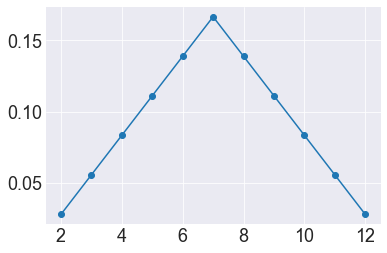

In [67]:
plt.plot(np.asarray(X).T[0],np.asarray(X).T[1],'-o')

**Programming Tip.**

In the preceding code note that `36.` is written with
the trailing decimal mark. This is a good habit to get into because division
in Python 2.x is integer division by default, which is not what we want here.
This can be fixed with a top-level `from __future__ import division`, but
that's easy to forget to do, especially when you are passing code
around and others may not reflexively do the future import.



The above example exposes the elements of probability theory that
are in play for this simple problem while deliberately suppressing some of the
gory technical details. 


With this framework, we can ask other questions like
**what is the probability that half the product of three dice will exceed the
their sum?** We can solve this using the same method as in the following. First,
let's create the first mapping,

In [28]:
dl = []
for i in range(1,7):
    for j in range(1,7):
        for k in range(1,7):
            dl.append([(i,j,k), ((i*j*k)/2>i+j+k)])

In [29]:
d = dict(dl)

In [30]:
len(d)

216

In [31]:
d=dict({(i,j,k):((i*j*k)/2>i+j+k) for i in range(1,7) 
                                  for j in range(1,7)  
                                  for k in range(1,7)})

In [32]:
len(d)

216

 **The keys of this dictionary are the triples and the values are the
logical values of whether or not half the product of three dice exceeds their sum.**


Now, we do the inverse mapping to collect the corresponding lists,

In [34]:
dinv = defaultdict(list)
for i,j in iter(d.items()): 
    dinv[j].append(i)

In [28]:
len(dinv)

2

 Note that `dinv` contains only two keys, `True` and `False`. Again,
because the dice are independent, the probability of any triple is $1/6^3$.
Finally, we collect this for each outcome as in the following,

In [36]:
X=[[i,len(j)/6.0**3] for i,j in iter(dinv.items())]
X

[[False, 0.37037037037037035], [True, 0.6296296296296297]]

 Thus, the probability of half the product of three dice exceeding their sum is
`136/(6.0**3) = 0.63`. The set that is induced by the random variable has only
two elements in it, `True` and `False`, with $\mathbb{P}(\mbox{True})=136/216$
and $\mathbb{P}(\mbox{False})=1-136/216$.

As a final example to exercise another layer of generality, **let is consider the
first problem with the two dice where we want the probability of a
seven, but this time one of the dice is no longer fair.**  The distribution for
the unfair die is the following:

$$
\begin{eqnarray*}
\mathbb{P}(\lbrace 1\rbrace)=\mathbb{P}(\lbrace 2 \rbrace)=\mathbb{P}(\lbrace 3 \rbrace)  = \frac{1}{9} \\\
\mathbb{P}(\lbrace 4\rbrace)=\mathbb{P}(\lbrace 5 \rbrace)=\mathbb{P}(\lbrace 6 \rbrace)  = \frac{2}{9} 
\end{eqnarray*}
$$

From our earlier work, we know the elements corresponding to the sum of seven
are the following:

$$
\lbrace (1,6),(2,5),(3,4),(4,3),(5,2),(6,1) \rbrace
$$

  Because we still have the independence assumption, **all we need to
change is the probability computation of each of elements.** For example, given
that the first die is the unfair one, we have

$$
\mathbb{P}((1,6)) = \mathbb{P}(1)\mathbb{P}(6) = \frac{1}{9} \times \frac{1}{6}
$$

  and likewise for $(2,5)$ we have the following:

$$
\mathbb{P}((2,5)) = \mathbb{P}(2)\mathbb{P}(5) = \frac{1}{9} \times \frac{1}{6}
$$

  and so forth. Summing all of these gives the following:

$$
\mathbb{P}_X(7) =  \frac{1}{9} \times \frac{1}{6} 
                      +\frac{1}{9} \times \frac{1}{6} 
                      +\frac{1}{9} \times \frac{1}{6} 
                      +\frac{2}{9} \times \frac{1}{6} 
                      +\frac{2}{9} \times \frac{1}{6} 
                      +\frac{2}{9} \times \frac{1}{6}  = \frac{1}{6}
$$

 Let's try computing this using Pandas instead
of Python dictionaries. First, we construct
a `DataFrame` object with an index of tuples
consisting of all pairs of possible dice outcomes.

In [69]:
d=pd.DataFrame(index=[(i,j) for i in range(1,7) for j in range(1,7)],
            columns=['sm','d1','d2','pd1','pd2','p'])

In [70]:
d

,sm,d1,d2,pd1,pd2,p
"(1, 1)",NaN,NaN,NaN,NaN,NaN,NaN
"(1, 2)",NaN,NaN,NaN,NaN,NaN,NaN
"(1, 3)",NaN,NaN,NaN,NaN,NaN,NaN
"(1, 4)",NaN,NaN,NaN,NaN,NaN,NaN
"(1, 5)",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
"(6, 2)",NaN,NaN,NaN,NaN,NaN,NaN
"(6, 3)",NaN,NaN,NaN,NaN,NaN,NaN
"(6, 4)",NaN,NaN,NaN,NaN,NaN,NaN
"(6, 5)",NaN,NaN,NaN,NaN,NaN,NaN


 Now, we can populate the columns that we set up above
where the outcome of the first die is the `d1` column and
the outcome of the second die is `d2`,

In [71]:
d.d1=[i[0] for i in d.index]
d.d2=[i[1] for i in d.index]

In [72]:
d

,sm,d1,d2,pd1,pd2,p
"(1, 1)",NaN,1,1,NaN,NaN,NaN
"(1, 2)",NaN,1,2,NaN,NaN,NaN
"(1, 3)",NaN,1,3,NaN,NaN,NaN
"(1, 4)",NaN,1,4,NaN,NaN,NaN
"(1, 5)",NaN,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...
"(6, 2)",NaN,6,2,NaN,NaN,NaN
"(6, 3)",NaN,6,3,NaN,NaN,NaN
"(6, 4)",NaN,6,4,NaN,NaN,NaN
"(6, 5)",NaN,6,5,NaN,NaN,NaN


 Next, we compute the sum of the dices in the `sm`
column,

In [73]:
d.sm = d.d1+d.d2

In [74]:
d.sm=list(map(sum,d.index))

 With that established, the DataFrame now looks like
the following:

In [75]:
d

,sm,d1,d2,pd1,pd2,p
"(1, 1)",2,1,1,NaN,NaN,NaN
"(1, 2)",3,1,2,NaN,NaN,NaN
"(1, 3)",4,1,3,NaN,NaN,NaN
"(1, 4)",5,1,4,NaN,NaN,NaN
"(1, 5)",6,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...
"(6, 2)",8,6,2,NaN,NaN,NaN
"(6, 3)",9,6,3,NaN,NaN,NaN
"(6, 4)",10,6,4,NaN,NaN,NaN
"(6, 5)",11,6,5,NaN,NaN,NaN


 Next, we fill out the probabilities for each face of the
unfair die (`d1`) and the fair die (`d2`),

In [48]:
d.loc[d.d1<=3,'pd1']

(1, 1)    NaN
(1, 2)    NaN
(1, 3)    NaN
(1, 4)    NaN
(1, 5)    NaN
         ... 
(3, 2)    NaN
(3, 3)    NaN
(3, 4)    NaN
(3, 5)    NaN
(3, 6)    NaN
Name: pd1, Length: 18, dtype: object

In [76]:
d.loc[d.d1<=3,'pd1'] = 1/9
d.loc[d.d1 > 3,'pd1']= 2/9
d.pd2=1/6.

In [52]:
d

,sm,d1,d2,pd1,pd2,p
"(1, 1)",2,1,1,0.111111,0.166667,NaN
"(1, 2)",3,1,2,0.111111,0.166667,NaN
"(1, 3)",4,1,3,0.111111,0.166667,NaN
"(1, 4)",5,1,4,0.111111,0.166667,NaN
"(1, 5)",6,1,5,0.111111,0.166667,NaN
...,...,...,...,...,...,...
"(6, 2)",8,6,2,0.222222,0.166667,NaN
"(6, 3)",9,6,3,0.222222,0.166667,NaN
"(6, 4)",10,6,4,0.222222,0.166667,NaN
"(6, 5)",11,6,5,0.222222,0.166667,NaN


 Finally, we can compute the joint probabilities
for the sum of the shown faces as the following:

In [77]:
d.p = d.pd1 * d.pd2

In [78]:
d

,sm,d1,d2,pd1,pd2,p
"(1, 1)",2,1,1,0.111111,0.166667,0.0185185
"(1, 2)",3,1,2,0.111111,0.166667,0.0185185
"(1, 3)",4,1,3,0.111111,0.166667,0.0185185
"(1, 4)",5,1,4,0.111111,0.166667,0.0185185
"(1, 5)",6,1,5,0.111111,0.166667,0.0185185
...,...,...,...,...,...,...
"(6, 2)",8,6,2,0.222222,0.166667,0.037037
"(6, 3)",9,6,3,0.222222,0.166667,0.037037
"(6, 4)",10,6,4,0.222222,0.166667,0.037037
"(6, 5)",11,6,5,0.222222,0.166667,0.037037


 With all that established, we can compute the
density of all the dice outcomes by using `groupby` as in the
following,

In [56]:
d.groupby('sm')['p'].sum()

sm
2     0.018519
3     0.037037
4     0.055556
5     0.092593
6     0.129630
        ...   
8     0.148148
9     0.129630
10    0.111111
11    0.074074
12    0.037037
Name: p, Length: 11, dtype: float64

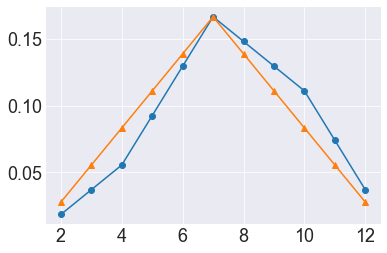

In [79]:
plt.plot(d.groupby('sm')['p'].sum(),'-o')
plt.plot(np.asarray(X).T[0],np.asarray(X).T[1],'-^')

  These examples have shown how the theory of probability
breaks down sets and measurements of  those sets and how these can be
combined to develop the probability mass functions for new random
variables. 

## Continuous Random Variables

**The same ideas work with continuous variables but managing the sets
becomes trickier because the real line, unlike discrete sets, has many
limiting properties already built into it that have to be handled
carefully.**  

Nonetheless, let's start with an example that should
illustrate the analogous ideas. 

Suppose a random variable $X$ is
uniformly distributed on the unit interval. What is the probability
that the variable takes on values less than 1/2? 

In order to build intuition onto the discrete case, let's go back to our
dice-throwing experiment with the fair dice. The **sum of the values of the dice
is a measurable function,**

$$
Y \colon \lbrace 1,2,\dots,6 \rbrace^2 \mapsto \lbrace 2,3,\ldots, 12 \rbrace
$$

 **That is, $Y$ is a mapping of the cartesian product of sets to a
discrete set of outcomes.** 

In order to compute probabilities of the set of
outcomes, we need to derive the probability measure for $Y$, $\mathbb{P}_Y$,
from the corresponding probability measures for each die. Our previous discussion
went through the mechanics of that. This means that

$$
\mathbb{P}_Y \colon \lbrace 2,3,\ldots,12 \rbrace \mapsto [0,1]
$$

 Note there is a separation between the function definition and where the
target items of the function are measured in probability. 

More bluntly,

$$
Y \colon A \mapsto B
$$

 with,

$$
\mathbb{P}_Y \colon B \mapsto [0,1]
$$

 **Thus, to compute $\mathbb{P}_Y$, which is derived 
from other random variables, we have to express the equivalence classes
in $B$ in terms of their progenitor $A$ sets.**

The situation for continuous variables follows the same pattern, but
with many more deep technicalities that we are going to skip. For the continuous
case, the random variable is now,

$$
X \colon \mathbb{R} \mapsto \mathbb{R}
$$

 with corresponding probability measure,

$$
\mathbb{P}_X \colon \mathbb{R} \mapsto [0,1]
$$

**But where are the corresponding sets here? Technically, these are the
*Borel* sets, but we can just think of them as intervals.**

Returning to our
question, what is the probability that a uniformly distributed random variable
on the unit interval takes values less than $1/2$? 

Rephrasing this question
according to the framework, we have the following:

$$
X \colon [0,1] \mapsto [0,1]
$$

 with corresponding,

$$
\mathbb{P}_X \colon [0,1] \mapsto [0,1]
$$

 **To answer the question,  by the definition of the uniform random
variable on the unit interval, we compute the following integral,**

$$
\mathbb{P}_X([0,1/2]) = \mathbb{P}_X(0 < X < 1/2) =  \int_0^{1/2} dx  = 1/2
$$

  where the above integral's $dx$ sweeps through intervals of the
$B$-type. The measure of any $dx$ interval (i.e., $A$-type set) is equal to
$dx$, by definition of the uniform random variable. To get all the moving parts
into one notationally rich integral, we can also  write this  as,

$$
\mathbb{P}_X(0 < X < 1/2) = \int_0^{ 1/2 } d\mathbb{P}_X(dx) = 1/2
$$

**Now, let's consider a slightly more complicated and interesting example. As
before, suppose we have a uniform random variable, $X$ and let us introduce
another random variable defined,**

$$
Y = 2 X
$$

Now, **what is the probability that $0 < Y < \frac{1}{2}$?**


To express this in our framework, we write,

$$
Y \colon [0,1] \mapsto [0,2]
$$

 with corresponding,

$$
\mathbb{P}_Y \colon [0,2] \mapsto [0,1]
$$

 To answer the question, we need to measure the set $[0,1/2]$, with
the probability measure for $Y$, $\mathbb{P}_Y([0,1/2])$. 

How can we do this?

Because $Y$ is derived from the $X$ random variable, as with the fair-dice
throwing experiment, we have to create a set of equivalences in the target
space (i.e., $B$-type sets) that reflect back on the input space (i.e.,
$A$-type sets). 

**That is, what is the interval $[0,1/2]$ equivalent to in terms
of the $X$ random variable?**

Because, functionally, $Y=2 X$, then the $B$-type
interval $[0,1/2]$ corresponds to the $A$-type interval $[0,1/4]$. 

From the
probability measure of $X$, we compute this with the integral,

$$
\mathbb{P}_Y([0,1/2]) =\mathbb{P}_X([0,1/4])=  \int_0^{1/4} dx  = 1/4
$$

Now, **let's up the ante and consider the following random variable,**

$$
Y = X^2
$$

 where now $X$ is still uniformly distributed, but now over the
interval $[-1/2,1/2]$.  

We can express this in our framework as,

$$
Y \colon [-1/2,1/2] \mapsto [0,1/4]
$$

 with corresponding,

$$
\mathbb{P}_Y \colon [0,1/4] \mapsto [0,1]
$$

 What is the $\mathbb{P}_Y(Y < 1/8)$?  In other words, what is the
measure of the set $B_Y= [0,1/8]$? 


As before, because $X$ is derived from our
uniformly distributed random variable, we have to reflect the $B_Y$ set onto
sets of the $A$-type.  


**The thing to recognize is that because $X^2$
is symmetric about zero, all $B_Y$ sets reflect back into two sets.**


**This means that for any set $B_Y$, we have the correspondence $B_Y = A_X^+ \cup
A_X^{-}$.  So, we have,**

$$
B_Y=\Big\lbrace 0<Y<\frac{1}{8}\Big\rbrace=\Big\lbrace 0<X<\frac{1}{\sqrt{8}} \Big\rbrace \bigcup \Big\lbrace -\frac{1}{\sqrt {8}}<X<0 \Big\rbrace
$$

  From this perspective, we have the following solution,

$$
\mathbb{P}_Y(B_Y)=\mathbb{P}(A_X^+)/2 + \mathbb{P}(A_X^{-})/2
$$

  where the $\frac{1}{2}$ comes from normalizing the $\mathbb{P}_Y$ to
one. Also,

$$
A_X^+    = \Big\lbrace 0<  X<\frac{1}{\sqrt{8}}   \Big\rbrace
$$

$$
\
A_X^{-}  = \Big\lbrace -\frac{1}{\sqrt {8}} <  X<0 \Big\rbrace
$$

  Therefore,

$$
\mathbb{P}_Y(B_Y) = \frac{1}{2\sqrt 8} + \frac{1}{2\sqrt 8}
$$

  because $\mathbb{P}(A_X^+) =\mathbb{P}(A_X^-) = 1/\sqrt 8$.  
  
  
  Let's
see if this comes out using the usual transformation of variables method from
calculus. Using this method, the density 

$f_Y(y) dy = f_X(x)dx$,

$f_Y(y) = f_X(x)\frac{dx}{dy}\big|_{x\to y}$,

$y = x^2$

$x = y^{1/2}$

$\frac{dx}{dy} = \frac{1}{2 y^{1/2}}$

$f_Y(y) = f_X(\sqrt y)/(2 \sqrt y) =
\frac{1}{2 \sqrt y} $. Then, we obtain,


$$
\int_0^{\frac{1}{8}} \frac{1}{2 \sqrt y} dy = \frac{1}{\sqrt 8}
$$

  which is what we got using the sets method. 
  
  **Note that you would
favor the calculus method in practice, but it is important to
understand the deeper mechanics, because sometimes
the usual calculus method fails, as the next problem shows.**

## Transformation of Variables Beyond Calculus

Suppose $X$ and $Y$ are uniformly distributed in the unit interval and we
define $Z$ as

$$
Z = \frac{X}{Y-X}
$$

  What is the $f_Z(z)$? If you try this using the usual calculus
method, you will fail (try it!). 

The problem is one of the technical prerequisites for the calculus method is not in force.

The key observation is that $Z \notin [-1,0]$.

**Both $X$ and $Y$ are positives.**

- **Assuming $Y>X$, so $Y-X>0$, and so $Z>0$;**
- **Assuming $Y<X$, so $Y-X<0$, and so $Z<-1$.**

If this were possible, the $X$ and $Y$ would have different signs, which cannot happen,
given that $X$ and $Y$ are uniformly distributed over $[0,1]$. 

Now, let's consider when $Z>0$. In this case, $Y>X$ because $Z$ cannot be positive
otherwise. 

For the density function, we are interested in the set  $\lbrace  0 < Z < z \rbrace $. We want to compute

$$
\mathbb{P}(Z<z) = \int \int B_1 dX dY
$$

 with,

$$
B_1 = \lbrace 0 < Z < z \rbrace
$$

  Now, we have to translate that interval into an interval
relevant to $X$ and $Y$. 

- For $0 < Z$, we have $ Y > X$. 

- For $Z < z $, we have $\frac{X}{Y-X}<z \implies
Y > X(1/z+1)$. 

Putting this together gives

$$
A_1 = \lbrace \max (X,X(1/z+1)) < Y < 1 \rbrace
$$

  Integrating this over $Y$ as follows,

$$
\int_0^1\lbrace\max(X,X(1/z+1))<Y<1 \rbrace dY = 1 - \max(X,X(1/z+1)) =\\
1 -X(1/z+1) =\frac{z-X-Xz}{z}\\\mbox{ where } z > \frac{X}{1-X}
$$

Notice that

$\max(X,X(1/z+1))$ with $z=\frac{X}{1-X}$ is $\max(X,X)=X$.

otherwise $\max(X,X(1/z+1)) = X(1/z+1)$ for $z > \frac{X}{1-X}$. 

Solving for $X$, we have

$ X < \frac{Z}{1+Z}$,


 and integrating this one more time over $X$ gives

$$
\int_0^{\frac{z}{1+z}} \frac{-X+z-Xz}{z} dX = \frac{z}{2(z+1)} \mbox{ where }  z > 0
$$

 Note that this is the computation for the *probability*
itself, not the probability density function. To get that, all we have
to do is differentiate $\left(f_Z(z)=\frac{d P(Z<z)}{dz}\right)$ the last expression to obtain

$$
f_Z(z) = \frac{1}{(z+1)^2} \mbox{ where }  z > 0
$$

 Now we need to compute this density using the same process
for when $Z < -1$. 

We want  the interval $ Z < z $ for when $Z < -1$.

For a fixed $z$, this is equivalent to $\frac{X}{Y-X}<z \implies X(1+1/z) < Y$. 

Because $z$ is negative (and $z<-1$), this also means that 

$(1+1/z) > 0 \implies X < Y \implies Y > X$. 

Under these terms, we
have the following integral,

$$
\int_0^1 \lbrace X(1/z+1) <Y< X\rbrace dY = X - X(1/z+1)\\
-\frac{X}{z} \mbox{ where }  z < -1
$$

 and integrating this one more time over $X$ gives the following

$$
-\frac{1}{2 z} \mbox{ where }  z < -1
$$

 To get the density for $z<-1$, we differentiate this with
respect to $z$ to obtain the following,

$$
f_Z(z) = \frac{1}{2 z^2} \mbox{ where }  z < -1
$$

 Putting this all together, we obtain,

$$
f_Z(z) = 
\begin{cases}
      \frac{1}{(z+1)^2}     & \mbox{if }  z > 0 \\\
      \frac{1}{2 z^2}       & \mbox{if }  z < -1 \\\
      0 & \mbox{otherwise }
\end{cases}
$$

  We will leave it as an exercise to show that this
integrates out to one. But let's try to simulate this process.

In [91]:
import sympy as sym

In [92]:
z = sym.Symbol('z')

In [93]:
sym.integrate(1/(z+1)**2,(z,0,sym.oo))

1

In [94]:
sym.integrate(1/(z)**2,(z,-sym.oo,-1))

1

We need to divide by 2!

$$
f_Z(z) = 
\begin{cases}
      \frac{1}{2(z+1)^2}     & \mbox{if }  z > 0 \\\
      \frac{1}{4 z^2}       & \mbox{if }  z < -1 \\\
      0 & \mbox{otherwise }
\end{cases}
$$

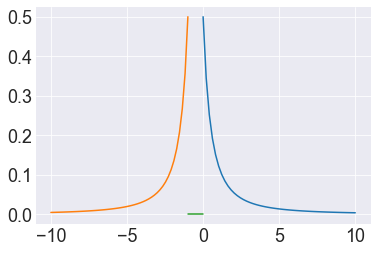

In [96]:
z0 = np.linspace(0,10)
zn = np.linspace(-10,-1)
zo = np.linspace(-1,0)

plt.plot(z0,(1/2)/(z0+1)**2)
plt.plot(zn,(1/2)/(zn)**2)
plt.plot(zo,0*zo)

In [97]:
X = np.random.rand(1000)
Y = np.random.rand(1000)
Z = X/(Y-X)

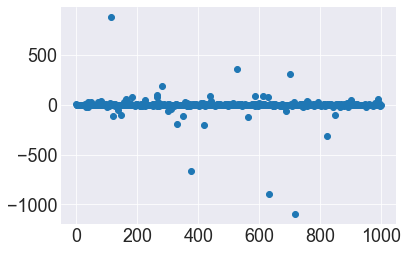

In [101]:
plt.plot(Z,'o')

(-2, 1)

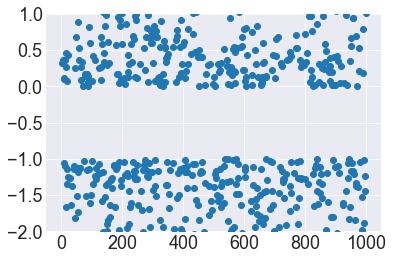

In [99]:
plt.plot(Z,'o')
plt.ylim(-2,1)

In [109]:
X = np.random.rand(10000)
Y = np.random.rand(10000)
Z = X/(Y-X)

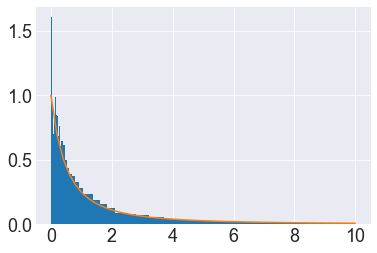

In [110]:
bins = np.logspace(-2,1)
_, _, _, = plt.hist(Z[Z>0],bins=bins,density=True)
plt.plot(z0,(1)/(z0+1)**2)

In [112]:
-np.logspace(0,1)

array([ -1.        ,  -1.04811313,  -1.09854114,  -1.1513954 ,
        -1.20679264,  -1.26485522,  -1.32571137,  -1.38949549,
        -1.45634848,  -1.52641797,  -1.59985872,  -1.67683294,
        -1.75751062,  -1.84206997,  -1.93069773,  -2.02358965,
        -2.12095089,  -2.22299648,  -2.32995181,  -2.44205309,
        -2.55954792,  -2.6826958 ,  -2.8117687 ,  -2.9470517 ,
        -3.0888436 ,  -3.23745754,  -3.39322177,  -3.55648031,
        -3.72759372,  -3.90693994,  -4.09491506,  -4.29193426,
        -4.49843267,  -4.71486636,  -4.94171336,  -5.17947468,
        -5.42867544,  -5.68986603,  -5.96362332,  -6.25055193,
        -6.55128557,  -6.86648845,  -7.19685673,  -7.54312006,
        -7.90604321,  -8.28642773,  -8.68511374,  -9.10298178,
        -9.54095476, -10.        ])

In [113]:
-np.logspace(0,1)[::-1]

array([-10.        ,  -9.54095476,  -9.10298178,  -8.68511374,
        -8.28642773,  -7.90604321,  -7.54312006,  -7.19685673,
        -6.86648845,  -6.55128557,  -6.25055193,  -5.96362332,
        -5.68986603,  -5.42867544,  -5.17947468,  -4.94171336,
        -4.71486636,  -4.49843267,  -4.29193426,  -4.09491506,
        -3.90693994,  -3.72759372,  -3.55648031,  -3.39322177,
        -3.23745754,  -3.0888436 ,  -2.9470517 ,  -2.8117687 ,
        -2.6826958 ,  -2.55954792,  -2.44205309,  -2.32995181,
        -2.22299648,  -2.12095089,  -2.02358965,  -1.93069773,
        -1.84206997,  -1.75751062,  -1.67683294,  -1.59985872,
        -1.52641797,  -1.45634848,  -1.38949549,  -1.32571137,
        -1.26485522,  -1.20679264,  -1.1513954 ,  -1.09854114,
        -1.04811313,  -1.        ])

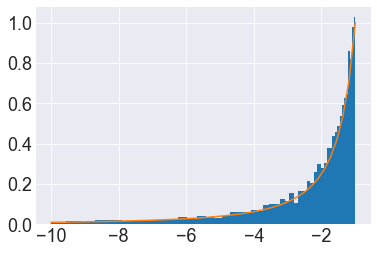

In [114]:
bins = -np.logspace(0,1)[::-1]
_, _, _, = plt.hist(Z[Z<-1],bins=bins,density=True)
plt.plot(zn,(1)/(zn)**2)

## Independent Random Variables

Independence is a standard assumption. Mathematically, the
necessary and sufficient condition for independence between two
random variables $X$  and $Y$ is the following:

$$
\mathbb{P}(X,Y) = \mathbb{P}(X)\mathbb{P}(Y)
$$

 Two random variables $X$  and $Y$ 
are *uncorrelated* if,

$$
\mathbb{E}[(X-\overline{X})(Y-\overline{Y})]=0
$$

 where $\overline{X}=\mathbb{E}(X)$. A similar condition is that $X$ and $Y$ are uncorrelated when their correlation coefficient is zero:
 
$$\rho(X,Y) = \frac{Cov[X,Y]}{\sqrt{Var[X]Var[Y]}} = 0
$$

where $Cov[X,Y] = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y]$ is convariance between $X$ and $Y$. 

Notice that $Cov[X,Y] = \mathbb{E}[(X-\overline{X})(Y-\overline{Y})]$. 

Notice also that $Cov[X,Y] = 0$ implies $\mathbb{E}[XY] = \mathbb{E}[X]\mathbb{E}[Y]$, so that independence implies uncorrelation.

**Uncorrelated random variables are sometimes called *orthogonal* random variables.**

**Uncorrelatedness is a weaker property than independence, however**. For example, consider the
discrete random variables $X$ and $Y$ uniformly distributed over the set
$\lbrace 1,2,3 \rbrace$ where

$$
X =  
\begin{cases} 
1 & \mbox{if } \omega =1 \\\
0 & \mbox{if } \omega =2  \\\
-1 & \mbox{if } \omega =3
\end{cases}
$$

 and also,

$$
Y =  
\begin{cases} 
0 & \mbox{if } \omega =1 \\\
1 & \mbox{if } \omega =2 \\\
0 & \mbox{if } \omega =3
\end{cases}
$$

 Thus, $\mathbb{E}(X)=0$ and $\mathbb{E}(X Y)=0$, so $X$ and $Y$ are uncorrelated. However, we have

$$
\mathbb{P}(X=1,Y=1)=0\neq \mathbb{P}(X=1)\mathbb{P}(Y=1)=\frac{1}{9}
$$

So, these two random variables are *not* independent.
**Thus, uncorrelatedness does not imply independence, generally. **

But
there is the important case of Gaussian random variables for which
it does. To see this, consider the probability density function
for two zero-mean, unit-variance Gaussian random variables $X$ and
$Y$,

$$
f_{X,Y}(x,y) = \frac{e^{\frac{x^2-2 \rho x
   y+y^2}{2 \left(\rho^2-1\right)}}}{2 \pi 
   \sqrt{1-\rho^2}}
$$

In [4]:
def plot_dg(rho=1e-16):
    x, y = np.meshgrid(np.linspace(-3,3),np.linspace(-3,3))
    z = np.exp((x**2 + y**2 - 2*rho*x*y)/(2*(rho**2-1)))/(2*np.pi*np.sqrt(1-rho**2))
    f, ax = plt.subplots()
    ax.contourf(x,y,z,cmap='viridis')
    ax.set_aspect('equal')

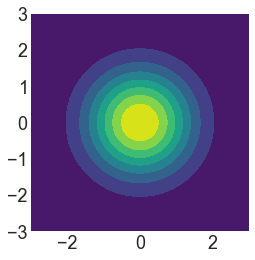

In [5]:
plot_dg()

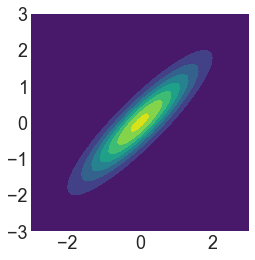

In [6]:
plot_dg(0.9)

In [7]:
from ipywidgets import interact
import ipywidgets as widgets

In [13]:
interact(plot_dg,rho=(1e-16,0.99,0.05))

interactive(children=(FloatSlider(value=1e-16, description='rho', max=0.99, min=1e-16, step=0.05), Output()), …

<function __main__.plot_dg(rho=1e-16)>

 where $\rho:=\mathbb{E}(X Y)$  is the correlation coefficient.  In
the uncorrelated case where $\rho=0$, the probability density function factors
into the following,

$$
f_{X,Y}(x,y)=\frac{e^{-\frac{1}{2}\left(x^2+y^2\right)}}{2\pi}=\frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}\frac{e^{-\frac{y^2}{2}}}{\sqrt{2\pi}}    =f_X(x)f_Y(y)
$$

 which means that $X$ and $Y$ are independent.

Independence and conditional independence are closely related, as in the following:

$$
\mathbb{P}(X,Y\vert Z) =\mathbb{P}(X\vert Z) \mathbb{P}(Y\vert Z)
$$

 which says that $X$ and $Y$ and independent conditioned
on $Z$. 

**Conditioning independent random variables can break
their independence.** 

Just remembering that conditional probability is:

$$P(A|B) = \frac{P(A,B)}{P(B)}$$

where $P(A,B) = P(A\cap B)$ is the probability that both $A$ and $B$ happen.

For example, consider two independent Bernoulli-distributed random variables,  $X_1, X_2\in\lbrace 0,1
\rbrace$.  We define $Z=X_1+X_2$. Note that $Z\in \lbrace
0,1,2 \rbrace$. In the case where $Z=1$, we have,

$$
\mathbb{P}(X_1\vert Z=1) >0
$$

$$
\
\mathbb{P}(X_2\vert Z=1) >0
$$

 Even though $X_1,X_2$ are independent,
after conditioning on $Z$, we have the following,

$$
\mathbb{P}(X_1=1,X_2=1\vert Z=1)=0\neq \mathbb{P}(X_1=1\vert Z=1)\mathbb{P}(X_2=1\vert Z=1)
$$

 Thus, conditioning on $Z$ breaks the independence of
$X_1,X_2$. 

**This also works in the opposite direction ---
conditioning can make dependent random variables independent.**


Define $Z_n=\sum_i^n X_i$ with $X_i$ independent, integer-valued
random variables.

The $Z_n$ variables are dependent because they stack the same telescoping set of $X_i$ variables. Consider the following,

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\mathbb{P}(Z_1=i,Z_3=j\vert Z_2=k) = \frac{\mathbb{P}(Z_1=i,Z_2=k,Z_3=j)}{\mathbb{P}(Z_2 =k)}
\label{_auto1} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:condIndep"></div>

$$
\begin{equation} \
=\frac{\mathbb{P}(X_1 =i)\mathbb{P}(X_2 =k-i)\mathbb{P}(X_3 =j-k) }{\mathbb{P}(Z_2 =k)}
\end{equation} 
\label{eq:condIndep} \tag{2}
$$

 where the factorization comes from the independence of
the $X_i$ variables. **Notice that for $Z_1=i$, we must have $X_1=i$. Also, for $Z_2=X_1+X_2=k$ we must have $X_2 = k-i$ and so on...**

Notice further that $\mathbb{P}(X_1 =i)\mathbb{P}(X_2 =k-i) = \mathbb{P}(Z_1 =i\vert Z_2=k) \mathbb{P}(Z_2=k)$, so that


$$
\mathbb{P}(Z_1=i,Z_3=j\vert Z_2=k) = \frac{\mathbb{P}(Z_1 =i\vert Z_2=k) \mathbb{P}(Z_2=k)$\mathbb{P}(X_3 =j-k)}{\mathbb{P}(Z_2 =k)}
$$

Also, $\mathbb{P}(X_3 =j-k) = \mathbb{P}(Z_3 =j\vert Z_2=k)$, and therefore:

$$
\mathbb{P}(Z_1=i,Z_3=j\vert Z_2=k) = \mathbb{P}(Z_1 =i\vert Z_2)\mathbb{P}(Z_3 =j\vert Z_2)
$$

**Thus, we see that dependence between
random variables can be broken by conditioning to create
conditionally independent random variables.**

As we have just
witnessed, understanding how conditioning influences independence
is important and is the main topic of
study in Probabilistic Graphical Models, a field
with many algorithms and concepts to extract these
notions of conditional independence from graph-based
representations of random variables.


## Classic Broken Rod Example

Let's do one last example to exercise fluency in our methods by
considering the following classic problem: given a rod of unit-length,
broken independently and randomly at two places, what is the
probability that you can assemble the three remaining pieces into a
triangle? The first task is to find a representation of a triangle as
an easy-to-apply constraint. What we want is something like the
following:

$$
\mathbb{P}(\mbox{ triangle exists }) = \int_0^1 \int_0^1 \lbrace \mbox{ triangle exists }  \rbrace dX dY
$$

 where $X$ and $Y$ are independent and uniformly distributed
in the unit-interval.  Heron's formula for the area of the triangle,

$$
\mbox{ area } = \sqrt{(s-a)(s-b)(s-c)s}
$$

 where $s = (a+b+c)/2$ is what we need. **The idea is that this
yields a valid area only when each of the terms under the square root is
greater than or equal to zero.** Thus, suppose that we have

$$
\begin{eqnarray*}
a  & = &  X  \\\
b  & = & Y-X \\\
c  & = & 1-Y 
\end{eqnarray*}
$$

 assuming that $Y>X$.  Thus, the criterion for a valid triangle boils down
to

$$
\lbrace (s > a) \wedge (s > b) \wedge (s > c) \wedge (X<Y) \rbrace
$$

where $\wedge = \&$ means "and".

 After a bit of manipulation, this  consolidates into:

$$
\Big\lbrace \frac{1}{2} < Y < 1 \bigwedge \frac{1}{2}(2 Y-1) < X < \frac{1}{2} \Big\rbrace
$$

  which we integrate out by $dX$ first to obtain

$$
\mathbb{P}(\mbox{ triangle exists }) = \int_{0}^1 \int_{0}^1 \Big\lbrace \frac{1}{2} < Y < 1 \bigwedge \frac{1}{2}(2 Y-1) < X < \frac{1}{2} \Big\rbrace dX dY
$$

$$
\mathbb{P}(\mbox{ triangle exists }) = \int_{\frac{1}{2}}^1 (1-Y) dY
$$

 and then by $dY$ to obtain finally,

$$
\mathbb{P}(\mbox{ triangle exists }) = \frac{1}{8}
$$

 when $Y>X$. By symmetry, we get the same result for $X>Y$. Thus, the
final result is the following:

$$
\mathbb{P}(\mbox{ triangle exists }) = \frac{1}{8}+\frac{1}{8} = \frac{1}{4}
$$

We can quickly check using this result using Python for the case $Y>X$ using
the following code:

In [27]:
x,y = np.random.rand(2,1000)

a,b,c = x,(y-x),1-y # 3 sides

s = (a+b+c)/2

np.mean((s>a) & (s>b)  & (s>c) & (y>x))

0.117

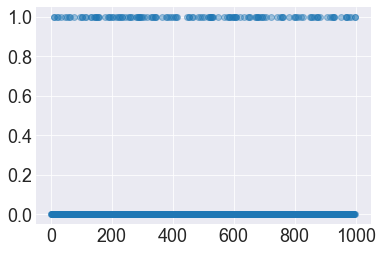

In [26]:
plt.plot((s>a) & (s>b)  & (s>c) & (y>x),'o',alpha=0.4)

In [22]:
1/8

0.125

**Programming Tip.**

The chained logical `&` symbols above tell Numpy that the logical operation
should be considered element-wise.

# Projection Methods

The concept of projection is key to developing an intuition about conditional
probability.  We already have a natural intuition of projection from looking at
the shadows of objects on a sunny day. As we will see, this simple idea consolidates many abstract ideas in optimization and mathematics.  

Consider
[Figure](#fig:probability_001) where we want to find a point along the blue
line (namely, $\mathbf{x}$) that is closest to the black square (namely,
$\mathbf{y}$). In other words, we want to inflate the gray circle until it just
touches the black line. Recall that the circle boundary is the set of points for
which

$$
\sqrt{(\mathbf{y}-\mathbf{x})^T(\mathbf{y}-\mathbf{x})} =\|\mathbf{y}-\mathbf{x} \| = \epsilon
$$

 for some value of $\epsilon$. So we want a point $\mathbf{x}$ along
the line that satisfies this for the smallest $\epsilon$.  Then, that point
will be the closest point on the black line to the black square.
 It may be obvious from the diagram, but **the closest point on the line
occurs where the line segment from the black square to the black line is
perpendicular to the line.** At this point, the gray circle just touches the black
line. This is illustrated below in [Figure](#fig:probability_002).

<!-- dom:FIGURE: [fig-probability/probability_001.png, width=500 frac=0.90] Given the point $\mathbf{y}$ (black square) we want to find the $\mathbf{x}$ along the line that is closest to it. The gray circle is the locus of points within a fixed distance from $\mathbf{y}$. <div id="fig:probability_001"></div> -->
<!-- begin figure -->
<div id="fig:probability_001"></div>

<p>Given the point $\mathbf{y}$ (black square) we want to find the $\mathbf{x}$ along the line that is closest to it. The gray circle is the locus of points within a fixed distance from $\mathbf{y}$.</p>
<img src="fig-probability/probability_001.png" width=500>

<!-- end figure -->

**Programming Tip.**

[Figure](#fig:probability_001) uses the `matplotlib.patches` module.  This
module contains primitive shapes like circles, ellipses, and rectangles that
can be assembled into complex graphics.  As shown in the code in the IPython
Notebook corresponding to this chapter, after importing a particular shape, you
can apply that shape to an existing axis  using the `add_patch` method.  The
patches themselves can by styled using the usual formatting keywords like
`color` and `alpha`.




<!-- dom:FIGURE: [fig-probability/probability_002.png, width=500 frac=0.90] The closest point on the line occurs when the line is tangent to the circle. When this happens, the black line and the line (minimum distance) are perpedicular.  <div id="fig:probability_002"></div> -->
<!-- begin figure -->
<div id="fig:probability_002"></div>

<p>The closest point on the line occurs when the line is tangent to the circle. When this happens, the black line and the line (minimum distance) are perpedicular.</p>
<img src="fig-probability/probability_002.png" width=500>

<!-- end figure -->


 Now that we can see what's going on, we can construct the the solution
analytically. We can represent an arbitrary point along the black line as:

$$
\mathbf{x}=\alpha\mathbf{v}
$$

 where $\alpha\in\mathbb{R}$ slides the point up and down the line with

$$
\mathbf{v} = \left[ 1,1 \right]^T
$$

 Formally, $\mathbf{v}$ is the *subspace* onto which we want to
*project* $\mathbf{y}$. 

At the closest point, the vector between
$\mathbf{y}$ and $\mathbf{x}$ (the *error* vector above) is
perpedicular to the line. This means that

$$
(\mathbf{y}-\mathbf{x} )^T \mathbf{v} = 0
$$

 and by substituting and working out the terms, we obtain

$$
\alpha = \frac{\mathbf{y}^T\mathbf{v}}{ \|\mathbf{v} \|^2}
$$

In vector notation we have:

$$
(\vec{y}-\vec{x})\cdot\vec{v} = 0 \\
\vec{y}\cdot\vec{v} = \vec{x}\cdot\vec{v}\\
\vec{y}\cdot\vec{v} = \alpha \vec{v}\cdot\vec{v}\\
\alpha = \frac{\vec{y}\cdot\vec{v}}{\vec{v}\cdot\vec{v}}
$$

 The *error* is the distance between $\alpha\mathbf{v}$ and $
\mathbf{y}$.  

This is a right triangle, and we can use the Pythagorean
theorem to compute the squared length of this error as

$$
\epsilon^2 = \|( \mathbf{y}-\mathbf{x} )\|^2 = \|\mathbf{y}\|^2 - \alpha^2 \|\mathbf{v}\|^2 = \|\mathbf{y}\|^2 - \frac{\|\mathbf{y}^T\mathbf{v}\|^2}{\|\mathbf{v}\|^2}
$$

 where $ \|\mathbf{v}\|^2 = \mathbf{v}^T \mathbf{v} $. Note that since $\epsilon^2 \ge 0 $, this also shows that

$$
\| \mathbf{y}^T\mathbf{v}\| \le \|\mathbf{y}\|  \|\mathbf{v}\|
$$

 which is the **famous and useful Cauchy-Schwarz inequality which we
will exploit later.**

Finally, we can assemble all of this into the *projection*
operator

$$
\mathbf{P}_v = \frac{1}{\|\mathbf{v}\|^2 } \mathbf{v v}^T
$$

In vector notation we would have:

$$
\mathbf{P}_v = \frac{\vec{v}}{\vec{v}\cdot\vec{v}} \vec{v}\cdot
$$

 With this operator, we can take any $\mathbf{y}$ and find the closest
point on $\mathbf{v}$ by doing

$$
\mathbf{P}_v \mathbf{y} = \mathbf{v} \left( \frac{  \mathbf{v}^T \mathbf{y} }{\|\mathbf{v}\|^2} \right)
$$

 where we recognize the term in parenthesis as the $\alpha$ we
computed earlier.  It's called an *operator* because it takes a vector
($\mathbf{y}$) and produces another vector ($\alpha\mathbf{v}$). **Thus,
projection unifies geometry and optimization.**

## Weighted distance

We can easily extend this projection operator to cases where the measure of
distance between $\mathbf{y}$ and the subspace $\mathbf{v}$ is weighted. We can
accommodate these weighted distances by re-writing the projection operator as

<!-- Equation labels as ordinary links -->
<div id="eq:weightedProj"></div>

$$
\begin{equation}
\mathbf{P}_v=\mathbf{v}\frac{\mathbf{v}^T\mathbf{Q}^T}{\mathbf{v}^T\mathbf{Q v}}
\end{equation}
\label{eq:weightedProj} \tag{1}
$$

 where $\mathbf{Q}$ is positive definite matrix.  In the previous
case, we started with a point $\mathbf{y}$ and inflated a circle centered at
$\mathbf{y}$ until it just touched the line defined by $\mathbf{v}$ and this
point was closest point on the line to $\mathbf{y}$. The same thing happens
in the general case with a weighted distance except now we inflate an
ellipse, not a circle, until the ellipse touches the line.

<!-- # @@@CODE src-probability/Projection.py fromto: ^theta@^fig,ax -->

<!-- dom:FIGURE: [fig-probability/probability_003.png, width=500 frac=0.95] In the weighted case, the closest point on the line is tangent to the ellipse and is still perpedicular in the sense of the weighted distance. <div id="fig:probability_003"></div> -->
<!-- begin figure -->
<div id="fig:probability_003"></div>

<p>In the weighted case, the closest point on the line is tangent to the ellipse and is still perpedicular in the sense of the weighted distance.</p>
<img src="fig-probability/probability_003.png" width=500>

<!-- end figure -->


Note that the error vector ($\mathbf{y}-\alpha\mathbf{v}$) in [Figure](#fig:probability_003) is still perpendicular to the line (subspace
$\mathbf{v}$), but in the space of the weighted distance, that is,

$$(\mathbf{y}-\mathbf{x} )^T \mathbf{Q}^T\mathbf{v} = 0$$


The difference
between the first projection (with the uniform circular distance) and the
general case (with the elliptical weighted distance) is the inner product
between the two cases.  For example, in the first case we have $\mathbf{y}^T
\mathbf{v}$ and in the weighted case we have $\mathbf{y}^T \mathbf{Q}^T
\mathbf{v}$. To move from the uniform circular case to the weighted ellipsoidal
case, all we had to do was change all of the vector inner products.  Before we
finish, we need a formal property  of projections:

$$
\mathbf{P}_v \mathbf{P}_v = \mathbf{P}_v
$$

 known as the *idempotent* property which basically says that once we
have projected onto a subspace, subsequent projections leave us in the
same subspace. You can verify this by using the definition

$$
\begin{equation}
\mathbf{P}_v=\mathbf{v}\frac{\mathbf{v}^T\mathbf{Q}^T}{\mathbf{v}^T\mathbf{Q v}}
\end{equation}
\label{eq:weightedProj}, %\tag{1}
$$
that is,

$$
\mathbf{P}_v \mathbf{P}_v = \mathbf{v}\frac{\mathbf{v}^T\mathbf{Q}^T}{\mathbf{v}^T\mathbf{Q v}}\mathbf{v}\frac{\mathbf{v}^T\mathbf{Q}^T}{\mathbf{v}^T\mathbf{Q v}} = \mathbf{P}_v \mathbf{P}_v
$$


**Thus, projection ties a minimization problem (closest point to a line) to an
algebraic concept (inner product).** 

It turns out that these same geometric ideas
from linear algebra [[strang2006linear]](#strang2006linear) can be translated to the conditional
expectation. How this works is the subject of our next  section.

# Conditional Expectation as Projection

Now that we understand projection methods geometrically, we can apply
them to conditional probability. **This is the *key* concept that ties
probability to geometry, optimization, and linear algebra.**

### Inner Product for Random Variables

 From our previous work on projection for vectors in
$\mathbb{R}^n$, we have a good geometric grasp on how projection is related to Minimum Mean Squared Error (MMSE).

By one abstract step, we can carry
all of our geometric interpretations to the space of random variables.
For example, we previously noted that at the point of projection, we had the following orthogonal (i.e.,  perpendicular vectors) condition,

$$
( \mathbf{y} - \mathbf{v}_{opt} )^T \mathbf{v} = 0
$$

 which by noting the inner product slightly more abstractly as
$\langle\mathbf{x},\mathbf{y} \rangle = \mathbf{x}^T \mathbf{y}$, we can
express as

$$
\langle \mathbf{y} - \mathbf{v}_{opt},\mathbf{v} \rangle = 0
$$

 and by defining the inner product for the random variables
$X$ and $Y$ as

$$
\langle X,Y \rangle = \mathbb{E}(X Y)
$$

 we have the same relationship:

$$
\langle X-h_{opt}(Y),Y \rangle = 0
$$

 which holds not for vectors in $\mathbb{R}^n$, but for random
variables $X$ and $Y$ and functions of those random variables. Exactly why this
is true is technical, but it turns out that one can build up the *entire theory
of probability* this way [[edward1987radically]](#edward1987radically), by using the expectation as
an inner product.

Furthermore, by abstracting out the inner product concept, we have connected
minimum-mean-squared-error (MMSE) optimization problems, geometry, and random
variables.  That's  a lot of mileage to get a out of an abstraction and it
enables us to shift between these interpretations to address real problems.
Soon, we'll do this with some examples, but first we collect the most important
result that flows naturally from this abstraction.

### Conditional Expectation as Projection

The conditional expectation is the minimum mean squared error (MMSE) solution
to the following problem (see appendix for proof using the Cauchy-Schwarz inequality):

$$
\min_h \int_{\mathbb{R}} (x - h(y) )^2 dx
$$

 with the minimizing $h_{opt}(Y) $ as

$$
h_{opt}(Y) = \mathbb{E}(X|Y)
$$

which is another way of saying that among all possible functions
$h(Y)$, the one that minimizes the MSE is $ \mathbb{E}(X|Y)$. 

From our previous discussion on projection, we noted that
these MMSE solutions can be thought of as projections onto a subspace that characterizes $Y$. For example, we previously noted that at the point of projection, we have perpendicular terms,

<!-- Equation labels as ordinary links -->
<div id="eq:ortho"></div>

$$
\begin{equation}
\langle X-h_{opt}(Y),Y \rangle = 0
\end{equation}
\label{eq:ortho} \tag{1}
$$

 but since we know that the MMSE solution

$$
h_{opt}(Y) = \mathbb{E}(X|Y)
$$

 we have by direct substitution,

<!-- Equation labels as ordinary links -->
<div id="eq:ortho_001"></div>
$$
\langle X-\mathbb{E}(X|Y),Y \rangle = 0
$$
$$
\begin{equation}
\mathbb{E}[(X-\mathbb{E}(X|Y))Y] = 0
\end{equation}
\label{eq:ortho_001} \tag{2}
$$

**That last step seems pretty innocuous, but it ties MMSE to
conditional expectation to the inner project abstraction, and in so doing, reveals the conditional expectation to be a projection operator for random variables.**

Just remembering that for vector we have $(\mathbf{y}-\mathbf{x} )^T \mathbf{v} = 0$, which $\mathbf{x}=\alpha \mathbf{v}$.


Before we develop this further, let's grab some quick dividends.
From the previous equation, by linearity of the expectation, we obtain,

$$
\langle X-\mathbb{E}(X|Y),Y \rangle = 0 \\
\langle X,Y\rangle - \langle \mathbb{E}(X|Y) Y\rangle = 0\\
\mathbb{E}(X Y) =  \mathbb{E}(Y \mathbb{E}(X|Y))
$$

which is the so-called *tower property* of the expectation. This works like scalar product between vectors, for instance, $(\vec{a}-\vec{b})\cdot\vec{c} = \vec{a}\cdot\vec{b} - \vec{a}\cdot\vec{c}$. Thus, since $\vec{a}\cdot\vec{b}\to\langle a,b \rangle\to \mathbb{E}(X Y)$


Note that
we could have found this by using the formal definition of conditional
expectation,

$$
\mathbb{E}(X|Y) = \int_{\mathbb{R}^2} x \frac{f_{X,Y}(x,y)}{f_Y(y)} dx dy
$$

 and brute-force direct integration,

$$
\mathbb{E}(Y \mathbb{E}(X|Y)) = \int_{\mathbb{R}} y \int_{\mathbb{R}} x \frac{f_{X,Y}(x,y)}{f_Y(y)}  f_Y(y) dx dy
$$

$$
\
                              =\int_{\mathbb{R}^2} x y f_{X,Y}(x,y) dx dy
$$

$$
\
                              =\mathbb{E}( X Y)
$$

 which is not very geometrically intuitive. This lack of geometric
intuition makes it hard to apply these concepts and keep track of these
relationships. 

We can keep pursuing this analogy and obtain the length of the error term 
from the orthogonality property of the MMSE solution as,

$$
\langle X-h_{opt}(Y),X-h_{opt}(Y)\rangle = \langle X,X  \rangle - \langle h_{opt}(Y),h_{opt}(Y)  \rangle
$$

 and then by substituting all the notation we obtain

$$
\mathbb{E}(X-  \mathbb{E}(X|Y))^2 = \mathbb{E}(X)^2 - \mathbb{E}(\mathbb{E}(X|Y) )^2
$$

 which would be tough to compute by direct integration.  

To formally establish that $\mathbb{E}(X|Y)$ *is* in fact *a projection operator* we
need to show idempotency.  Recall that idempotency means that once we project
something onto a subspace, further projections do nothing. In the space of
random variables, $\mathbb{E}(X|\cdot$) is the idempotent projection as we can
show by noting that

$$
h_{opt} = \mathbb{E}(X|Y)
$$

 is purely a function of $Y$, so that

$$
\mathbb{E}(h_{opt}(Y)|Y) = h_{opt}(Y)
$$

 because $Y$ is fixed, this verifies idempotency. Thus, conditional
expectation is the corresponding projection operator for random variables. We
can continue to carry over our geometric interpretations of projections for
vectors ($\mathbf{v}$) into random variables ($X$).  With this important
result, let's consider some examples of conditional expectations obtained by
using brute force to find the optimal MMSE function $h_{opt}$ as well as by
using our new perspective on conditional expectation.

**Example.** Suppose we have a random variable, $X$, then what constant is closest to $X$ in
the sense of the mean-squared-error (MSE)? In other words, which $c \in
\mathbb{R}$ minimizes the following mean squared error:

$$
\mbox{MSE} = \mathbb{E}( X - c )^2
$$

 we can work this out many ways. First, using calculus-based optimization,

$$
\mathbb{E}(X-c)^2=\mathbb{E}(c^2-2 c X + X^2)=c^2-2 c \mathbb{E}(X) + \mathbb{E}(X^2)
$$

 and then take the first derivative with respect to $c$ and solve:

$$
c_{opt}=\mathbb{E}(X)
$$

 Remember that $X$ may potentially take on many values, but this says
that the closest number to $X$ in the MSE sense is $\mathbb{E}(X)$.  This is
intuitively pleasing.  Coming at this same problem using our inner product,
from Equation ref{eq:ortho_001} we know that at the point of projection

$$
\mathbb{E}((X-c_{opt}) 1) = 0
$$

  where the $1$ represents the space of constants 
we are projecting onto. By linearity of the expectation, gives

$$
c_{opt}=\mathbb{E}(X)
$$

 Using the projection approach, because $\mathbb{E}(X|Y)$ is
the projection operator, with $Y=\Omega$ (the entire underlying
probability space), we have, using the definition of conditional
expectation:

$$
\mathbb{E}(X|Y=\Omega) = \mathbb{E}(X)
$$

 This is because of the subtle fact that a random variable over the entire
$\Omega$ space can only be a constant.  Thus, we just worked the same problem
three ways (optimization, orthogonal inner products, projection).

**Example.** Let's consider the following example with probability density
$f_{X,Y}= x + y $ where $(x,y) \in [0,1]^2$ and compute the conditional
expectation straight from the definition:

$$
\mathbb{ E}(X|Y) = \int_0^1 x \frac{f_{X,Y}(x,y)}{f_Y(y)} dx=  \int_0^1 x \frac{x+y}{y+1/2} dx =\frac{3 y + 2}{6 y + 3}
$$

 That was pretty easy because the density function was so simple. Now,
let's do it the hard way by going directly for the MMSE solution $h(Y)$. Then,

$$
\mbox{ MSE } = \underset{h}\min \int_0^1\int_0^1 (x - h(y) )^2 f_{X,Y}(x,y)dx dy
$$

$$
\
             = \underset{h}\min \int_0^1 y h^2 {\left (y \right )} - y h{\left (y \right )} + \frac{1}{3} y + \frac{1}{2} h^{2}{\left (y \right )} - \frac{2}{3} h{\left (y \right )} + \frac{1}{4} dy
$$

 Now we have to find a function $h$ that is going to minimize this.
Solving for a function, as opposed to solving for a number, is generally very,
very hard, but because we are integrating over a finite interval, we can use
the Euler-Lagrange method from variational calculus to take the derivative of
the integrand with respect to the function $h(y)$ and set it to zero. Using
Euler-Lagrange methods, we obtain the following result,

$$
2 y h{\left (y \right )} - y + h{\left (y \right )} - \frac{2}{3} =0
$$

 Solving this gives

$$
h_{opt}(y)= \frac{3 y + 2}{6 y + 3}
$$

  which is what we obtained before. Finally, we can solve this
using our inner product in Equation ref{eq:ortho} as

$$
\mathbb{E}((X-h(Y)) Y)=0
$$

  Writing this out gives,

$$
\int_0^1\int_0^1 (x-h(y))y(x+y) dx dy = \int_0^1\frac{1}{6}y(-3(2 y+1) h(y)+3 y+2) dy=0
$$

 and the integrand must be zero,

$$
2 y + 3 y^2 - 3 y h(y) - 6 y^2 h(y)=0
$$

 and solving this for $h(y)$ gives the same solution:

$$
h_{opt}(y)= \frac{3 y + 2}{6 y + 3}
$$

 Thus, doing it by the brute force integration from the definition,
optimization, or inner product gives us the same answer; but, in general, no
method is necessarily easiest because they both involve potentially difficult
or impossible integration, optimization, or functional equation solving.  The
point is that now that we have a deep toolbox, we can pick and choose which
tools we want to apply for different problems.

Before we leave this example, let's use Sympy to verify the length of the error
function we found earlier for this example:

$$
\mathbb{E}(X-\mathbb{E}(X|Y))^2=\mathbb{E}(X)^2-\mathbb{E}(\mathbb{E}(X|Y))^2
$$

 that is based on the Pythagorean theorem. First, we 
need to compute the marginal densities,

In [6]:
from sympy.abc import y,x
from sympy import integrate, simplify
fxy = x + y                 # joint density
fy = integrate(fxy,(x,0,1)) # marginal density
fx = integrate(fxy,(y,0,1)) # marginal density

 Then, we need to write out the conditional expectation,

In [7]:
EXY = (3*y+2)/(6*y+3) # conditional expectation

 Next, we can compute the left side, $\mathbb{E}(X-\mathbb{E}(X|Y))^2$,
as the following,

In [8]:
# from the definition
LHS=integrate((x-EXY)**2*fxy,(x,0,1),(y,0,1)) 
LHS # left-hand-side

-log(216)/144 + log(72)/144 + 1/12

 We can similarly compute the right side, $\mathbb{E}(X)^2-\mathbb{E}(\mathbb{E}(X|Y))^2$,
as the following,

In [9]:
# using Pythagorean theorem
RHS=integrate((x)**2*fx,(x,0,1))-integrate((EXY)**2*fy,(y,0,1))
RHS # right-hand-side

-log(216)/144 + log(72)/144 + 1/12

 Finally, we can verify that the left and right sides match,

In [10]:
print simplify(LHS-RHS)==0

True


In this section, we have pulled together all the projection and least-squares
optimization ideas from the previous sections to connect geometric notions of
projection from vectors in $\mathbb{R}^n$ to random variables. This resulted in
the remarkable realization that the conditional expectation is in fact a
projection operator for random variables.  Knowing this allows to approach
difficult problems in multiple ways, depending on which way is more intuitive
or tractable in a particular situation. Indeed, finding the right problem to
solve is the hardest part, so having many ways of looking at the same concepts
is crucial.

For much more detailed development, the book by Mikosch
[[mikosch1998elementary]](#mikosch1998elementary) has some excellent sections covering much of this
material with a similar geometric interpretation. Kobayashi
[[kobayashi2011probability]](#kobayashi2011probability) does too.  Nelson [[edward1987radically]](#edward1987radically) also
has a similar presentation based on hyper-real numbers.

## Appendix

We want to prove that we the conditional expectation is the
minimum mean squared error minimizer of the following:

$$
J= \min_h \int_{ \mathbb{R}^2 } \lvert X - h(Y) \rvert^2 f_{X,Y}(x,y) dx dy
$$

 We can expand this as follows,

$$
\begin{multline*}
J=\min_h \int_{ \mathbb{R}^2 } \lvert X \rvert^2 f_{X,Y}(x,y) dx dy + \int_{ \mathbb{R}^2 } \lvert h(Y) \rvert^2 f_{X,Y}(x,y) dx dy \\\
- \int_{ \mathbb{R}^2 } 2 X h(Y) f_{X,Y}(x,y) dx dy
\end{multline*}
$$

 To minimize this, we have to maximize the following:

$$
A=\max_h \int_{ \mathbb{R}^2 }  X h(Y) f_{X,Y}(x,y) dx dy
$$

 Breaking up the integral using the definition of conditional expectation

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
A =\max_h \int_\mathbb{R} \left(\int_\mathbb{R} X  f_{X|Y}(x|y) dx \right)h(Y) f_Y(y) dy 
\label{_auto1} \tag{3}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} \
=\max_h \int_\mathbb{R} \mathbb{E}(X|Y) h(Y)f_Y(Y) dy 
\label{_auto2} \tag{4}
\end{equation}
$$

 From properties of the Cauchy-Schwarz inequality, we know that the
maximum happens when $h_{opt}(Y) = \mathbb{E}(X|Y)$, so we have found the
optimal $h(Y)$ function as:

$$
h_{opt}(Y) = \mathbb{E}(X|Y)
$$

 which shows that the optimal function is the conditional expectation.

In [24]:
import numpy as np
np.random.seed(12345)

# Conditional Expectation and Mean Square Error

In this section, we work through a detailed example using conditional
expectation and optimization methods.  Suppose we have two fair six-sided die
($X$ and $Y$) and we want to measure the sum of the two variables as $Z=X+Y$.
Further, let's suppose that given $Z$, we want the best estimate of $X$ in the
mean-squared-sense. Thus, we want to minimize the following:

$$
J(\alpha) = \sum ( x - \alpha z )^2 \mathbb{P}(x,z)
$$

 where $\mathbb{P}$ is the probability mass function for this problem.
The idea is that when we have solved this problem, we will have a function of
$Z$ that is going to be the minimum MSE  estimate of $X$.  We can substitute in
for $Z$ in $J$ and get:

$$
J(\alpha) = \sum ( x - \alpha (x+y) )^2 \mathbb{P}(x,y)
$$

  Let's work out the steps in Sympy in the following:

In [25]:
import sympy as S
from sympy.stats import density, E, Die

x=Die('D1',6)     # 1st six sided die
y=Die('D2',6)     # 2nd six sides die
a=S.symbols('a')
z = x+y           # sum of 1st and 2nd die
J = E((x-a*(x+y))**2) # expectation
print S.simplify(J)

329*a**2/6 - 329*a/6 + 91/6


 With all that setup we can now use basic calculus to minimize the
objective function $J$,

In [26]:
sol,=S.solve(S.diff(J,a),a) # using calculus to minimize
print sol # solution is 1/2

1/2


**Programming Tip.**

Sympy has a `stats` module that can do some basic work with expressions
involving probability densities and expectations. The above code uses its `E`
function to compute the expectation.



 This says that $z/2$ is the MSE estimate of $X$ given $Z$ which means
geometrically (interpreting the MSE as a squared distance weighted by the
probability mass function) that $z/2$ is as *close* to $x$ as we are going to
get for a given $z$.

Let's look at the same problem using the conditional expectation operator $
\mathbb{E}(\cdot|z) $ and apply it to our definition of $Z$. Then

$$
\mathbb{E}(z|z)=\mathbb{E}(x+y|z)=\mathbb{E}(x|z)+\mathbb{E}(y|z)=z
$$

 using the linearity of the expectation. Now, since by the
symmetry of the problem (i.e., two identical die), we have

$$
\mathbb{E}(x|z)=\mathbb{E}(y|z)
$$

 we can plug this in and solve

$$
2 \mathbb{E}(x|z)=z
$$

 which once again gives,

$$
\mathbb{E}(x|z)  =\frac{z}{2}
$$

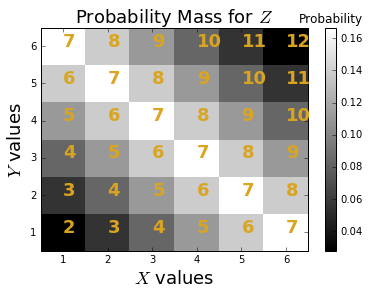

In [27]:
%matplotlib inline

from numpy import arange,array
from matplotlib.pylab import subplots, cm
from sympy import Integer
fig,ax = subplots()
v = arange(1,7) + arange(1,7)[:,None]
foo=lambda i: density(z)[Integer(i)].evalf() # some tweaks to get a float out
Zmass=array(map(foo,v.flat),dtype=float).reshape(6,6)

pc=ax.pcolor(arange(1,8),arange(1,8),Zmass,cmap=cm.gray)
_=ax.set_xticks([(i+0.5) for i in range(1,7)])
_=ax.set_xticklabels([str(i) for i in range(1,7)])
_=ax.set_yticks([(i+0.5) for i in range(1,7)])
_=ax.set_yticklabels([str(i) for i in range(1,7)])
for i in range(1,7):
    for j in range(1,7):
        _=ax.text(i+.5,j+.5,str(i+j),fontsize=18,fontweight='bold',color='goldenrod')

_=ax.set_title(r'Probability Mass for $Z$',fontsize=18)    
_=ax.set_xlabel('$X$ values',fontsize=18)
_=ax.set_ylabel('$Y$ values',fontsize=18);
cb=fig.colorbar(pc)
_=cb.ax.set_title(r'Probability',fontsize=12)
#fig.savefig('fig-probability/Conditional_expectation_MSE_001.png')

<!-- dom:FIGURE: [fig-probability/Conditional_expectation_MSE_001.png, width=500 frac=0.85] The values of $Z$ are in yellow with the corresponding values for $X$ and $Y$ on the axes. The gray scale colors indicate the underlying joint probability density. <div id="fig:Conditional_expectation_MSE_001"></div> -->
<!-- begin figure -->
<div id="fig:Conditional_expectation_MSE_001"></div>

<p>The values of $Z$ are in yellow with the corresponding values for $X$ and $Y$ on the axes. The gray scale colors indicate the underlying joint probability density.</p>
<img src="fig-probability/Conditional_expectation_MSE_001.png" width=500>

<!-- end figure -->


 which is equal to the estimate we just found by minimizing the MSE.
Let's explore this further with [Figure](#fig:Conditional_expectation_MSE_001).  [Figure](#fig:Conditional_expectation_MSE_001) shows the values of $Z$ in yellow with
the corresponding values for $X$ and $Y$ on the axes.  Suppose $z=2$, then the
closest $X$ to this is $X=1$, which is what $\mathbb{E}(x|z)=z/2=1$ gives. What
happens when $Z=7$? In this case, this value is spread out diagonally along the
$X$ axis so if $X=1$, then $Z$ is 6 units away, if $X=2$, then $Z$ is 5 units
away and so on.

Now, back to the original question, if we had $Z=7$ and we wanted
to get as close as we could to this using $X$, then why not choose
$X=6$ which is only one unit away from $Z$? The problem with doing
that is $X=6$ only occurs 1/6 of the time, so we are not likely to
get it right the other 5/6 of the time. So, 1/6 of the time we are
one unit away but 5/6 of the time we are much more than one unit
away. This means that the MSE score is going to be worse. Since
each value of $X$ from 1 to 6 is equally likely, to play it safe,
we choose $7/2$ as the estimate, which is what the conditional
expectation suggests.

We can check this claim with samples using Sympy below:

In [28]:
import numpy as np
from sympy import stats
# Eq constrains Z
samples_z7 = lambda : stats.sample(x, S.Eq(z,7)) 
#using 6 as an estimate
mn= np.mean([(6-samples_z7())**2 for i in range(100)]) 
#7/2 is the MSE estimate
mn0= np.mean([(7/2.-samples_z7())**2 for i in range(100)]) 
print 'MSE=%3.2f using 6 vs MSE=%3.2f using 7/2 ' % (mn,mn0)

MSE=8.44 using 6 vs MSE=2.43 using 7/2 


**Programming Tip.**

The `stats.sample(x, S.Eq(z,7))` function call samples the `x` variable subject
to a condition on the `z` variable. In other words, it generates random samples
of `x` die, given that the sum of the outcomes of that die and the `y` die add
up to `z==7`.



 Please run the above code repeatedly in the Jupyter/IPython
Notebook corresponding to this section until you have convinced
yourself  that the $\mathbb{E}(x|z)$ gives the lower MSE every
time.  To push this reasoning, let's consider the case where the
die is so biased so that the outcome of `6` is ten times more
probable than any of the other outcomes. That is,

$$
\mathbb{P}(6) = 2/3
$$

 whereas $\mathbb{P}(1)=\mathbb{P}(2)=\ldots=\mathbb{P}(5)=1/15$.
We can explore this using Sympy as in the following:

In [29]:
# here 6 is ten times more probable than any other outcome
x=stats.FiniteRV('D3',{1:1/15., 2:1/15., 
                       3:1/15., 4:1/15.,
                       5:1/15., 6:2/3.})

 As before, we construct the sum of the two dice, and plot the
corresponding probability mass function in [Figure](#fig:Conditional_expectation_MSE_002).  As compared with [Figure](#fig:Conditional_expectation_MSE_001), the probability mass has been shifted
away from the smaller numbers.

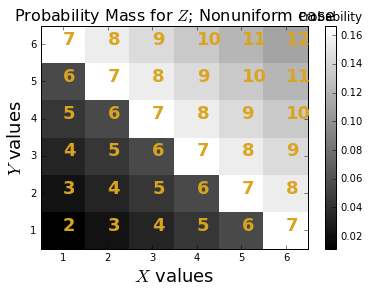

In [30]:
z = x + y
foo=lambda i: density(z)[S.Integer(i)].evalf() # some tweaks to get a float out
v = np.arange(1,7) + np.arange(1,7)[:,None]
Zmass=np.array(map(foo,v.flat),dtype=float).reshape(6,6)

from matplotlib.pylab import subplots, cm
fig,ax=subplots()
pc=ax.pcolor(np.arange(1,8),np.arange(1,8),Zmass,cmap=cm.gray)
_=ax.set_xticks([(i+0.5) for i in range(1,7)])
_=ax.set_xticklabels([str(i) for i in range(1,7)])
_=ax.set_yticks([(i+0.5) for i in range(1,7)])
_=ax.set_yticklabels([str(i) for i in range(1,7)])
for i in range(1,7):
    for j in range(1,7):
        _=ax.text(i+.5,j+.5,str(i+j),fontsize=18,fontweight='bold',color='goldenrod')

_=ax.set_title(r'Probability Mass for $Z$; Nonuniform case',fontsize=16)    
_=ax.set_xlabel('$X$ values',fontsize=18)
_=ax.set_ylabel('$Y$ values',fontsize=18);
cb=fig.colorbar(pc)
_=cb.ax.set_title(r'Probability',fontsize=12)
#fig.savefig('fig-probability/Conditional_expectation_MSE_002.png')

<!-- dom:FIGURE: [fig-probability/Conditional_expectation_MSE_002.png, width=500 frac=0.85] The values of $Z$ are in yellow with the corresponding values for $X$ and $Y$ on the axes.  <div id="fig:Conditional_expectation_MSE_002"></div> -->
<!-- begin figure -->
<div id="fig:Conditional_expectation_MSE_002"></div>

<p>The values of $Z$ are in yellow with the corresponding values for $X$ and $Y$ on the axes.</p>
<img src="fig-probability/Conditional_expectation_MSE_002.png" width=500>

<!-- end figure -->


Let's see what the conditional expectation says about how we can estimate $X$
from $Z$.

In [31]:
E(x, S.Eq(z,7)) # conditional expectation E(x|z=7)

5.00000000000000

  Now that we have $\mathbb{E}(x|z=7) = 5$, we can generate
samples as before and see if this gives the minimum MSE.

In [32]:
samples_z7 = lambda : stats.sample(x, S.Eq(z,7)) 
#using 6 as an estimate
mn= np.mean([(6-samples_z7())**2 for i in range(100)]) 
#5 is the MSE estimate
mn0= np.mean([(5-samples_z7())**2 for i in range(100)]) 
print 'MSE=%3.2f using 6 vs MSE=%3.2f using 5 ' % (mn,mn0)

MSE=4.08 using 6 vs MSE=2.20 using 5 


Using a simple example, we have emphasized the connection between minimum mean
squared error problems and conditional expectation. Hopefully, the last two
figures helped expose the role of the probability density.  Next, we'll
continue revealing  the true power of the conditional expectation as we
continue to develop corresponding geometric intuition.